# Tugas 1

Ganti constant `STATIC` menjadi path ke gambar-gambar yang akan digunakan dan `OUT` menjadi path ke output directory. Contoh jika gambar ada di directory yang sama dengan script ini, maka value nya menjadi `"."`. Library yang dibutuhkan untuk menjalankan script ini adalah sebagai berikut: `scikit-image`, `matplotlib`, `numpy`, dan `ipympl`. Cara menjalankan scriptnya sama seperti menjalankan notebook biasa.

In [1]:
import os
from pathlib import Path

SUB = "lab1"
BASE_DIR = Path(os.path.abspath("")).resolve(strict=True).parent
OUT = os.path.join(BASE_DIR, "out", SUB)
STATIC = os.path.join(BASE_DIR, "static", SUB)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, exposure, filters, io, morphology, util
# %matplotlib widget

## Sunflower

Di soal ini, saya menggunakan module `exposure` dari scikit image library untuk melakukan histogram equalization pada gambar sunflower. Lalu melakukan mapping contrast stretching manual ke gambar sunflower. Menggunakan module `util` dari scikit image dan `pyplot` dari matplotlib untuk menambilpan histogram dan gambar untuk di analisa.

In [3]:
sunflower = io.imread(os.path.join(STATIC, "sunflower.jpg"))

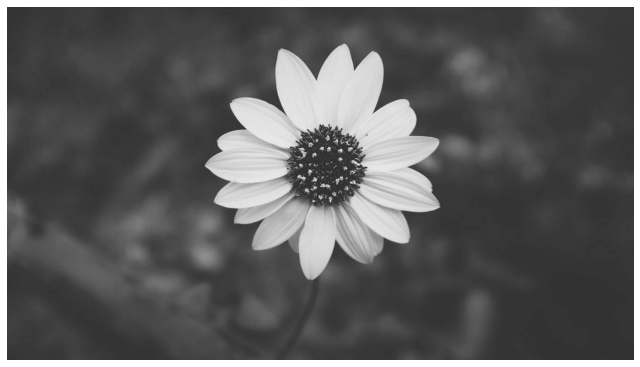

In [4]:
fig, ax0 = plt.subplots(figsize=(9, 6))
ax0.imshow(sunflower, cmap="gray")
ax0.set_axis_off()
fig.tight_layout()
plt.show()

### Histogram

In [5]:
sunflower_hist = util.img_as_ubyte(sunflower)

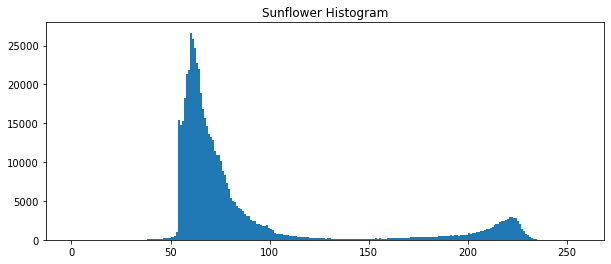

In [6]:
fig, ax0 = plt.subplots(figsize=(10, 4))
ax0.hist(sunflower_hist.flatten(), 256, range=(0, 256))
ax0.set_title("Sunflower Histogram")
plt.show()

### Histogram Equalization

In [7]:
sunflower_histeq = exposure.equalize_hist(sunflower)
sunflower_histeq_hist = util.img_as_ubyte(sunflower_histeq)

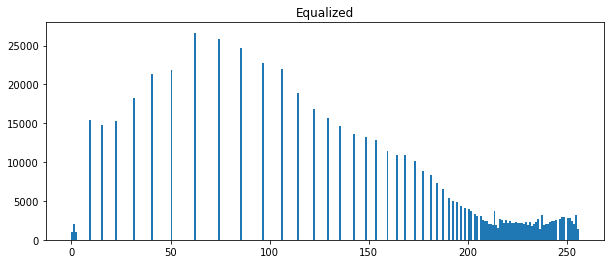

In [8]:
fig, ax0 = plt.subplots(figsize=(10, 4))
ax0.hist(sunflower_histeq_hist.flatten(), 256, range=(0, 256))
ax0.set_title("Equalized")
plt.show()

### Contrast Stretching

In [9]:
sunflower_max_range = max(sunflower.flatten())
sunflower_min_range = min(sunflower.flatten())
b = int(np.floor(255 / (sunflower_max_range - sunflower_min_range)))
sunflower_stretch = (sunflower - sunflower_min_range) * b
sunflower_stretch_hist = util.img_as_ubyte(sunflower_stretch)

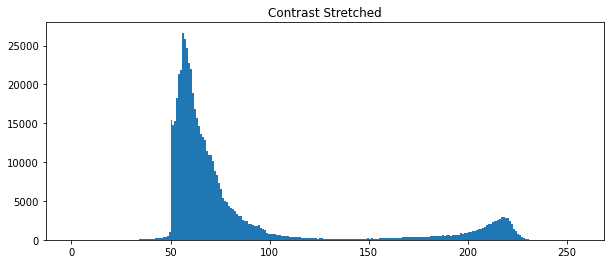

In [10]:
fig, ax0 = plt.subplots(figsize=(10, 4))
ax0.hist(sunflower_stretch_hist.flatten(), 256, range=(0, 256))
ax0.set_title("Contrast Stretched")
plt.show()

### Analisis

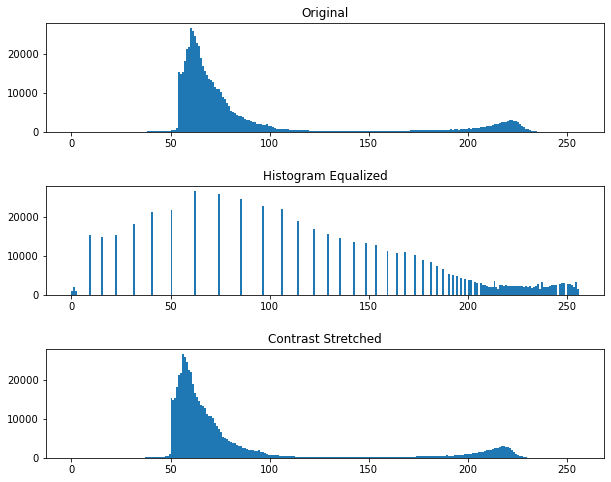

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 8))
ax0.hist(sunflower_hist.flatten(), 256, range=(0, 256))
ax0.set_title("Original")
ax1.hist(sunflower_histeq_hist.flatten(), 256, range=(0, 256))
ax1.set_title("Histogram Equalized")
ax2.hist(sunflower_stretch_hist.flatten(), 256, range=(0, 256))
ax2.set_title("Contrast Stretched")
fig.subplots_adjust(hspace=0.5)
plt.show()

Hal pertama yang gampang dilihat adalah penyebaran contrast nya. Gambar asli memiliki contrast yang lumayan menyebar, lebih banyak di gelap.

Setelah di apply `Histogram Equalization`, histogram dari gambar sunflower menjadi lebih sparse. Contrast yang awalnya sudah lumayan menyebar sekarang menjadi lebih menyebar lagi. Kita bisa lihat hotspot contrast di range 50-100 penyebarannya sangat sparse. Area 200-230 juga penyebarannya lumayan besar, tetapi tidak sebesar 50-100.

Di lain sisi, histogram gambar yang di apply `Contrast Stretching` tidak jauh beda dengan histogram original. Hasil ini dikarenakan oleh cara contrast stretching bekerja yang sifatnya hanya naive mapping. Kita bisa tarik bahwa di gambar original, ada setidaknya satu pixel dimana tingkat contrast nya sangat rendah dan ada satu pixel lain yang tingkat contrast nya sangat tinggi. Hal tersebut menyebabkan *stretching* yang tidak optimal.

Kita bisa cek minimum dan maximum contrast level dengan cara berikut.

In [12]:
print(f"Sunflower\nMax = {sunflower_max_range}\nMin = {sunflower_min_range}")

Sunflower
Max = 255
Min = 4


Kita bisa lihat dengan value diatas, contrast nya hanya akan di stretch ke bawah (rendah) sebanyak 4 value yang menghasilkan gambar yang hampir identikal dengan yang asli.

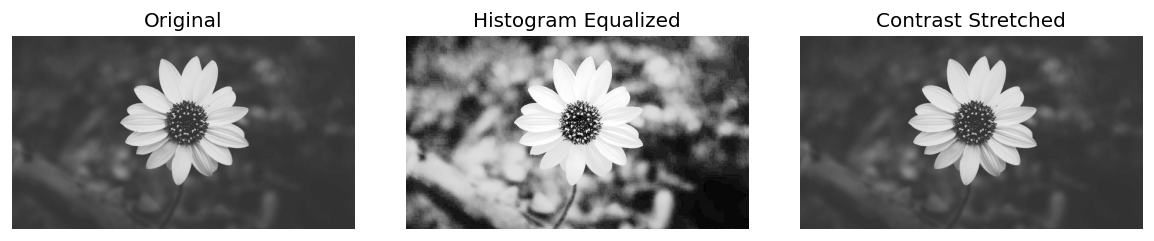

In [13]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 2), dpi=120)
ax0.imshow(sunflower, cmap="gray")
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(sunflower_histeq, cmap="gray")
ax1.set_title("Histogram Equalized")
ax1.set_axis_off()
ax2.imshow(sunflower_stretch, cmap="gray")
ax2.set_title("Contrast Stretched")
ax2.set_axis_off()
fig.tight_layout()
plt.show()

## Iris

Di soal ini, saya menggunakan module `filters` dari scikit image untuk mendapatkan horizontal dan vertical edges dari gambar iris dengan algoritma sobel dan prewitt. Lalu kedua gambar horizontal dan vertical di gabung untuk menampilkan edges keseluruhan dengan bantuan library `numpy` untuk "menambahkan" kedua gambar tersebut.

In [14]:
iris = io.imread(os.path.join(STATIC, "iris.jpg"))
iris_gray = color.rgb2gray(iris)

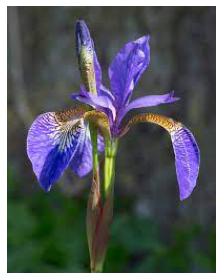

In [15]:
fig, ax0 = plt.subplots()
ax0.imshow(iris, cmap="gray")
ax0.set_axis_off()
fig.tight_layout()
plt.show()

### Horizontal Edge

In [16]:
iris_sobel_h = util.img_as_ubyte(filters.sobel_h(iris_gray))
iris_prewitt_h = util.img_as_ubyte(filters.prewitt_h(iris_gray))

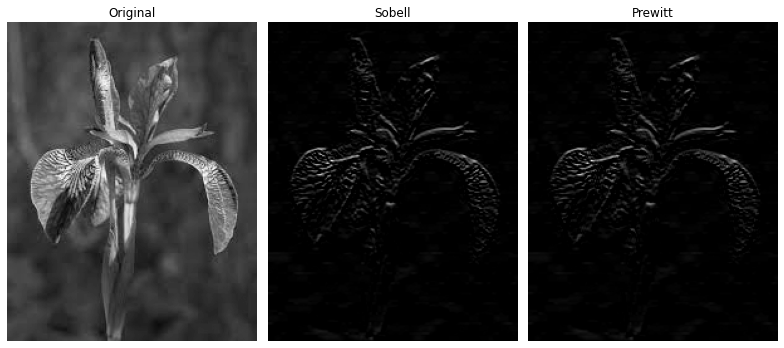

In [17]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(11, 5))
ax0.imshow(iris_gray, cmap="gray")
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(iris_sobel_h, cmap="gray")
ax1.set_title("Sobell")
ax1.set_axis_off()
ax2.imshow(iris_prewitt_h, cmap="gray")
ax2.set_title("Prewitt")
ax2.set_axis_off()
fig.tight_layout()
plt.show()

### Vertical Edge

In [18]:
iris_sobel_v = util.img_as_ubyte(filters.sobel_v(iris_gray))
iris_prewitt_v = util.img_as_ubyte(filters.prewitt_v(iris_gray))

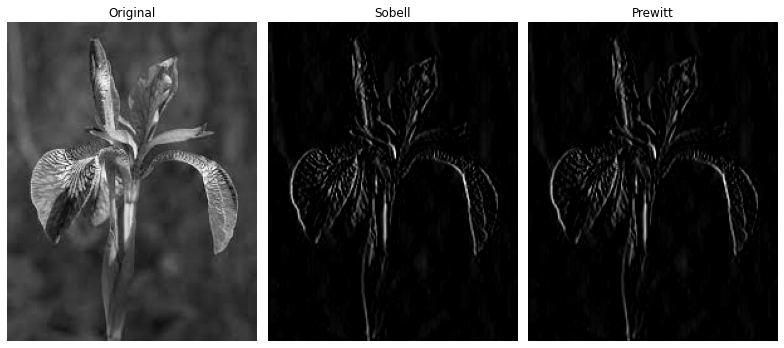

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(11, 5))
ax0.imshow(iris_gray, cmap="gray")
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(iris_sobel_v, cmap="gray")
ax1.set_title("Sobell")
ax1.set_axis_off()
ax2.imshow(iris_prewitt_v, cmap="gray")
ax2.set_title("Prewitt")
ax2.set_axis_off()
fig.tight_layout()
plt.show()

### Keseluruhan

In [20]:
iris_sobel = np.add(iris_sobel_v, iris_sobel_h, dtype="int16")
iris_prewitt = np.add(iris_prewitt_v, iris_prewitt_h, dtype="int16")

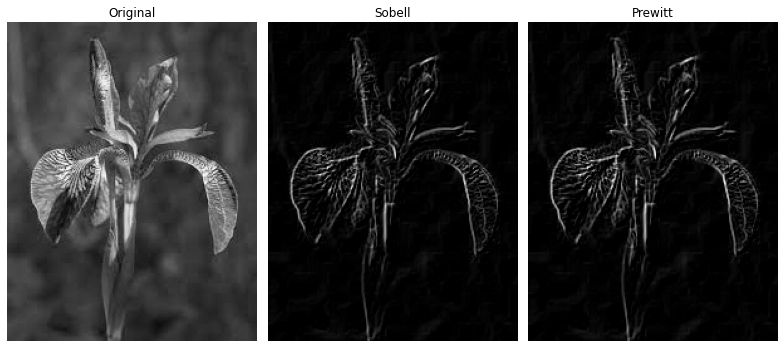

In [21]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(11, 5))
ax0.imshow(iris_gray, cmap="gray")
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(iris_sobel, cmap="gray")
ax1.set_title("Sobell")
ax1.set_axis_off()
ax2.imshow(iris_prewitt, cmap="gray")
ax2.set_title("Prewitt")
ax2.set_axis_off()
fig.tight_layout()
plt.show()

## Starfish

Di soal ini, saya menggunakan module `filters` dan `morpholohy` untuk melakukan median dan median smoothing ke gambar starfish untuk mengilangkan noise. Hasil dari kedua algoritma tersebut dianalisa untuk dilihat performa nya.

In [22]:
starfish = io.imread(os.path.join(STATIC, "starfish.png"))

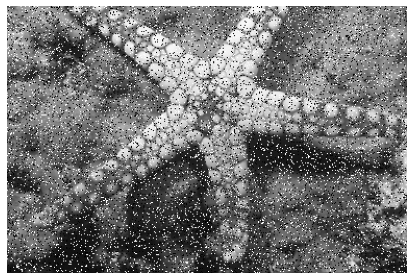

In [23]:
fig, ax0 = plt.subplots()
ax0.imshow(starfish, cmap="gray")
ax0.set_axis_off()
fig.tight_layout()
plt.show()

### Median Filter

In [24]:
starfish_med = filters.rank.median(starfish, selem=morphology.square(9))

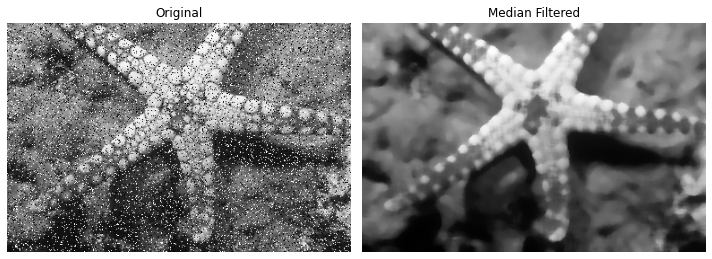

In [25]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.imshow(starfish, cmap="gray")
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(starfish_med, cmap="gray")
ax1.set_title("Median Filtered")
ax1.set_axis_off()
fig.tight_layout()
plt.show()

### Mean Filter

In [26]:
starfish_mean = filters.rank.mean(starfish, selem=morphology.square(9))

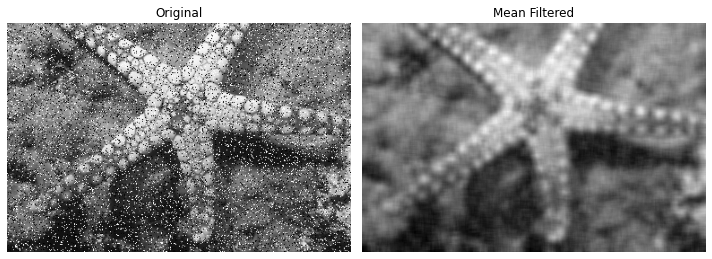

In [27]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.imshow(starfish, cmap="gray")
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(starfish_mean, cmap="gray")
ax1.set_title("Mean Filtered")
ax1.set_axis_off()
fig.tight_layout()
plt.show()

### Analisis

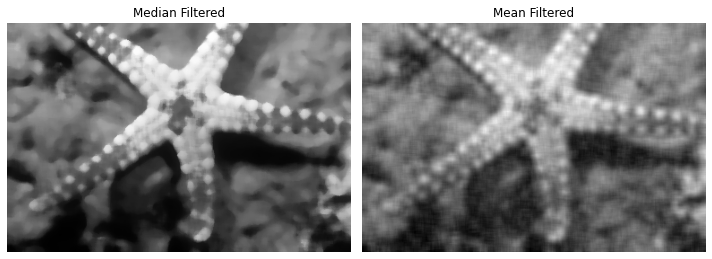

In [28]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.imshow(starfish_med, cmap="gray")
ax0.set_title("Median Filtered")
ax0.set_axis_off()
ax1.imshow(starfish_mean, cmap="gray")
ax1.set_title("Mean Filtered")
ax1.set_axis_off()
fig.tight_layout()
plt.show()

Dilihat kedua gambar diatas sekilas, jelas bahwa median filter menghasilkan gambar yang lebih jelas dibandingkan mean filter. Edges yang dihasilkan mean filter terlihat blurry, sedangkan median filter menghasilkan edges yang lebih jelas.

Hal hal ini dikarenakan cara mean filter bekerja, dimana dia akan menghitung average value dari neighboring pixels. Karena sifat dari noise yang di apply adalah salt and pepper dimana banyak pixel yang mempunyai intensitas 0 atau 255 (maksimal), hasil dari average nya akan skewed dan menurunkan contrast nya sehingga edges nya jadi tidak jelas.

Dilain sisi, median filter mengambil nilai tengah (setelah di urutkan berdasarkan intensitas) dari neighboring pixels. Karena noise nya selalu 0 atau 255, noise tidak akan pernah di ambil atau mempengaruhi hasil dari smoothing nya.